### Importing Modules

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import imageio.v2 as imageio
import sklearn.datasets as skl_data
from PIL import Image

## Processing Images

### Function for Converting Train Dataset JPGs into Pixel Data

Each image is 208x176 pixels and the number of files for each category in the train and test dataset are below. Therefore, there will be 36608 pxiels of data. There are 5121 jpg files total in the train dataset. 

I will use these facts to initialize a 2 dimensional array (5121 x 36608)

In [73]:
def JPG2Pixel_Training_Data(directory):
    train_complete_array = np.zeros((5121,36608))
    i = 0
    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename.endswith('.jpg'):
                train_file_path = os.path.join(root, filename)
                train_pixelated_image = Image.open(train_file_path)
                train_numpy_array = np.asarray(train_pixelated_image)
                train_reshaped_image = train_numpy_array.reshape(1, -1)
                train_complete_array[i] = train_reshaped_image
                i += 1
    return train_complete_array

In [74]:
Train_Dataset = "/Users/bigyambat/Desktop/TRGN_ML/Alzheimer_Dataset/train"


In [75]:
final_train_array = JPG2Pixel_Training_Data(Train_Dataset)

In [76]:
np.shape(final_train_array)

(5121, 36608)

### Function for Converting Test Datset JPG into Pixel Data

Each image is 208x176 pixels and the number of files for each category in the train and test dataset are below. Therefore, there will be 36608 pixels of data. There are 1279 jpg files in the test dataset.

I will use these facts to initialize a 2 dimensional array (1279 x 36608)

In [64]:
def JPG2Pixel_Test_Data(directory):
    test_complete_array = np.zeros([1279,36608])
    i = 0
    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename.endswith('.jpg'):
                test_file_path = os.path.join(root, filename)
                test_pixelated_image = Image.open(test_file_path)
                test_numpy_array = np.asarray(test_pixelated_image)
                test_reshaped_image = test_numpy_array.reshape(1, -1)
                test_complete_array[i] = test_reshaped_image
                i += 1
    return test_complete_array

In [65]:
Test_Dataset = "/Users/bigyambat/Desktop/TRGN_ML/Alzheimer_Dataset/test"

In [66]:
final_test_array = JPG2Pixel_Test_Data(Test_Dataset)

In [44]:
np.shape(final_test_array)

(1279, 36608)

## Data Wrangling

### Creating Dataframe for Train Dataset

In [45]:
train_df = pd.DataFrame(final_train_array)

In [46]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,36598,36599,36600,36601,36602,36603,36604,36605,36606,36607
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
train_df.max(axis='columns')

0       255.0
1       255.0
2       255.0
3       255.0
4       255.0
        ...  
5116    252.0
5117    255.0
5118    255.0
5119    255.0
5120    255.0
Length: 5121, dtype: float64

In [52]:
train_df.max(axis='columns').max()

255.0

Based on the value above, the test dataset has a maximum pixel value of 255. 

### Creating Dataframe for Test Dataset

In [53]:
test_df = pd.DataFrame(final_test_array)

In [54]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,36598,36599,36600,36601,36602,36603,36604,36605,36606,36607
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
test_df.max(axis ='columns')

0       252.0
1       255.0
2       255.0
3       255.0
4       255.0
        ...  
1274    253.0
1275    251.0
1276    254.0
1277    255.0
1278    248.0
Length: 1279, dtype: float64

In [55]:
test_df.max(axis ='columns').max()

255.0

Based on the value above, the test dataset has a maximum pixel value of 255. 

### Adding Labels to Data

The JPG2Pixel functions above iterated through the test and the train class folders in the following order

1. Very Mild Demebted
2. Moderate Demented
3. Mild Demented
4. Non Demented

Based on these classes (and the number of files for each class), I am able to deduce the labels for each row of the train_df and test_df

### Train Dataframe

In [92]:
train_df['Labels']= 'Classes'

In [99]:
train_df.loc[0:1791,'Labels'] = 'Very Mild Demented'
train_df.loc[1791:1843,'Labels'] = 'Moderate Demented'
train_df.loc[1843:2560,'Labels'] = 'Mild Demented'
train_df.loc[2560:5120,'Labels'] = 'Non Demented'


In [100]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,36599,36600,36601,36602,36603,36604,36605,36606,36607,Labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
5117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
5118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
5119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented


### Test Dataframe

In [102]:
test_df['Labels']= 'Classes'

In [103]:
test_df.loc[0:447,'Labels'] = 'Very Mild Demented'
test_df.loc[447:459,'Labels'] = 'Moderate Demented'
test_df.loc[459:638,'Labels'] = 'Mild Demented'
test_df.loc[638:1278,'Labels'] = 'Non Demented'

In [104]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,36599,36600,36601,36602,36603,36604,36605,36606,36607,Labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
1275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
1276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
1277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented


### Visualizing the Data

<function matplotlib.pyplot.show(close=None, block=None)>

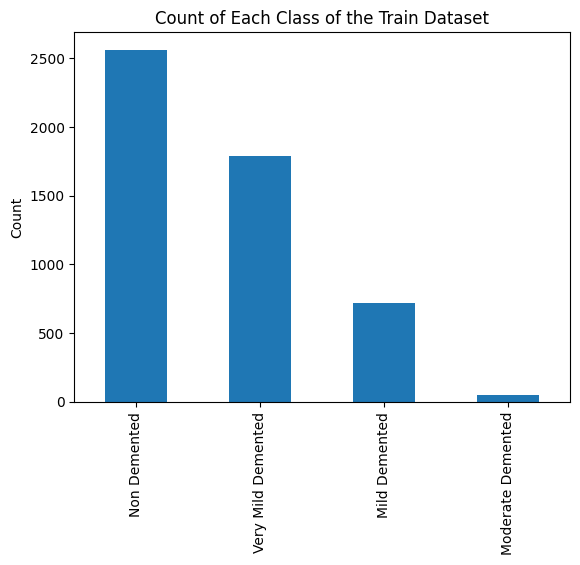

In [128]:
train_df['Labels'].value_counts().plot(kind='bar', ylabel = "Count", title="Count of Each Class of the Train Dataset")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

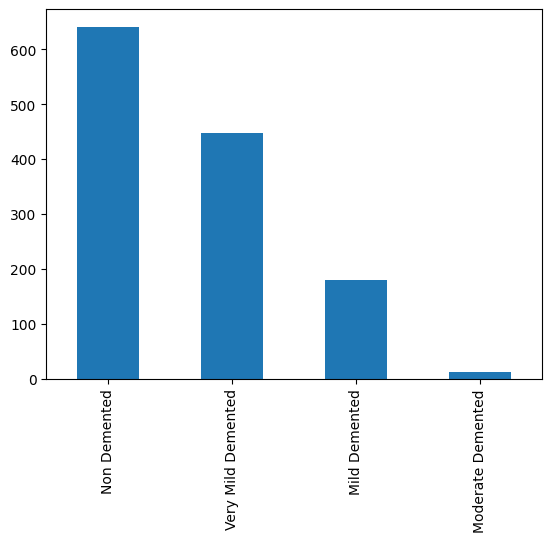

In [126]:
test_df['Labels'].value_counts().plot(kind='bar')
plt.show